In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [7]:
def load_data(filename: str) -> pd.DataFrame:
    df = pd.read_csv(filename, delimiter=';')
    df = df.drop(columns=['FFTW-E'])
    return df

In [8]:
algorithm_names = {
    'CT-I+B+BRP+S-2': 'Кули-Тьюки Итеративный + Barrier + BRP + Stride R2',
    'CT-I+B+DRP+S-4': 'Кули-Тьюки Итеративный + Barrier + DRP + Stride R4',
    'CT-I+BRP+S-2': 'Кули-Тьюки Итеративный + BRP + Stride R2',
    'CT-I+DRP+S-4': 'Кули-Тьюки Итеративный + DRP + Stride R4',
    'CT-R+B+BRP-2': 'Кули-Тьюки Рекурсивный + Barrier + BRP R2',
    'CT-R+B+DRP-4': 'Кули-Тьюки Рекурсивный + Barrier + DRP R4',
    'CT-R+BRP-2': 'Кули-Тьюки Рекурсивный + BRP R2',
    'CT-R+DRP-4': 'Кули-Тьюки Рекурсивный + DRP R4',
    'CT-R-2': 'Кули-Тьюки Рекурсивный R2',
    'CT-R-4': 'Кули-Тьюки Рекурсивный R4',
    'S-I+A-2': 'Стокхам Итеративный Асинхронный R2',
    'S-I+A-4': 'Стокхам Итеративный Асинхронный R4',
    'S-I-2': 'Стокхам Итеративный R2',
    'S-I-4': 'Стокхам Итеративный R4',
    'S-R-2': 'Стокхам Рекурсивный R2',
    'S-R-4': 'Стокхам Рекурсивный R4'
}

## 1. Сравнение рекурсивных и итеративных версий Кули-Тьюки

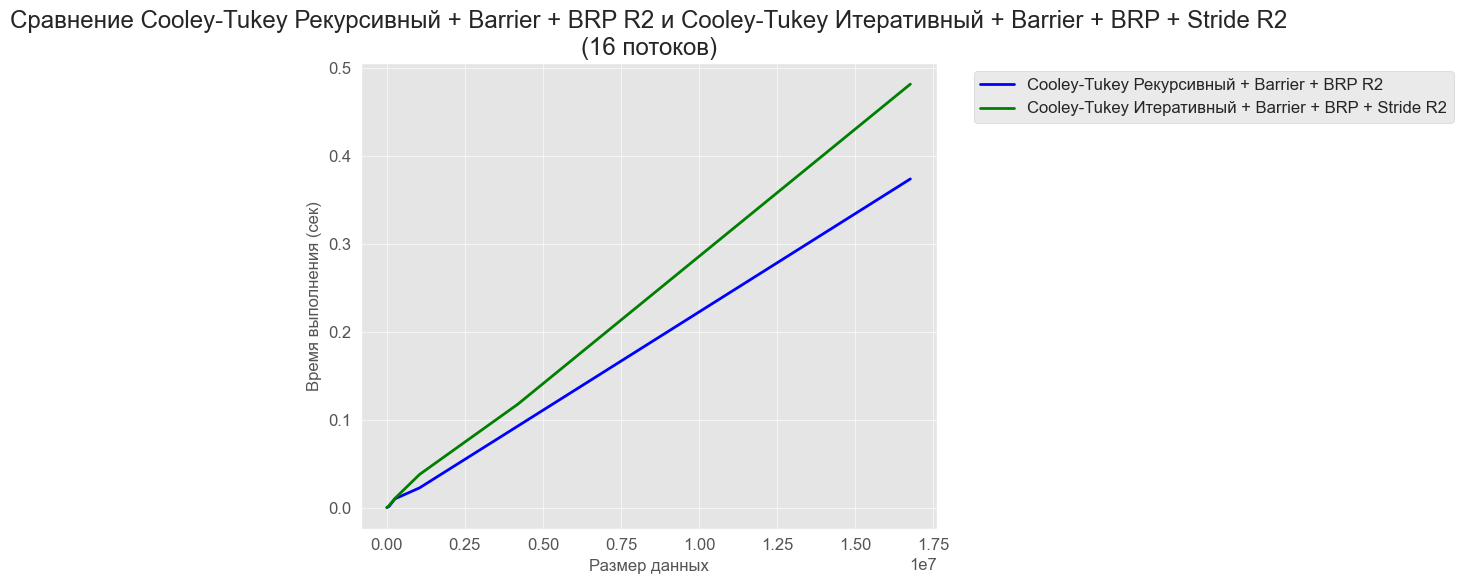

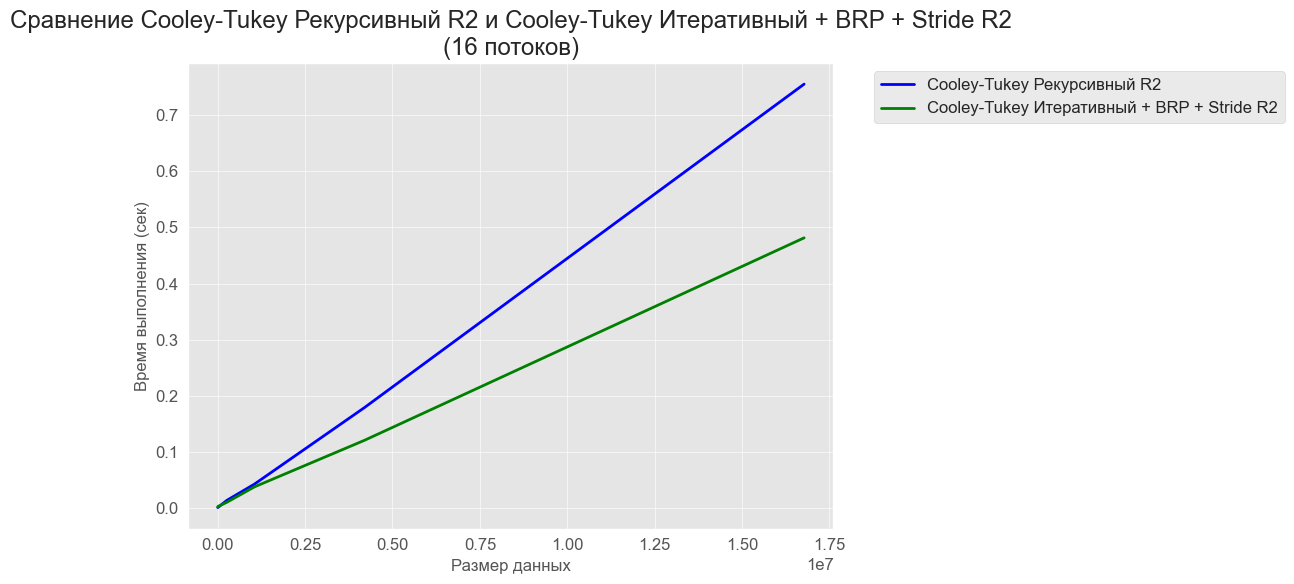

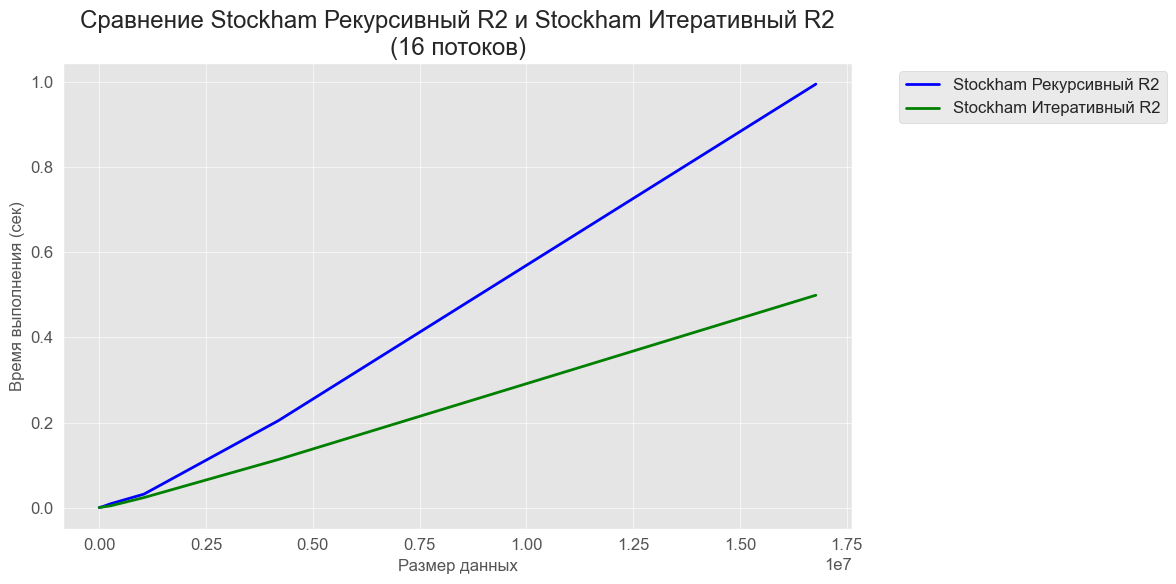

In [19]:
def compare_algorithms(recursive_alg, iterative_alg, threads=16, df=None):
    """
    Сравнивает рекурсивный и итеративный алгоритмы
    """
    if df is None:
        df = load_data(f'../output/timer-{threads}.csv')

    plt.figure(figsize=(12, 6))
    plt.plot(df['Size'], df[recursive_alg],
             label=algorithm_names[recursive_alg],
             color='blue', linewidth=2)
    plt.plot(df['Size'], df[iterative_alg],
             label=algorithm_names[iterative_alg],
             color='green', linewidth=2)

    plt.title(f'Сравнение {algorithm_names[recursive_alg]} и {algorithm_names[iterative_alg]}\n({threads} потоков)')
    plt.xlabel('Размер данных', fontsize=12)
    plt.ylabel('Время выполнения (сек)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which="both", ls="-", alpha=0.6)
    plt.tight_layout()
    plt.show()

df_16 = load_data('../output/timer-16.csv')

# 1. Сравнение CT-R+B+BRP-2 и CT-I+B+BRP+S-2
compare_algorithms('CT-R+B+BRP-2', 'CT-I+B+BRP+S-2', df=df_16)
# 2. Сравнение CT-R-2 и CT-I+BRP+S-2
compare_algorithms('CT-R-2', 'CT-I+BRP+S-2', df=df_16)
# 3. Сравнение S-R-2 и S-I-2
compare_algorithms('S-R-2', 'S-I-2', df=df_16)

# compare_algorithms('CT-R+DRP-4', 'CT-I+DRP+S-4', df=df_16)
# compare_algorithms('CT-R+B+DRP-4', 'CT-I+B+DRP+S-4', df=df_16)